<a href="https://colab.research.google.com/github/kavithachitriki/UPGRAD_PRACTICE/blob/main/ML_C41__EDA_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ml-c41-eda-session')
jovian.set_colab_id('1KryH2lBIr4RP46vT1ANqqigLa4F9dyqw')

## EDA --> Exploratory Data Analysis
### Data Loading
### Data Understanding --> Data Dictionary (Reference Document contains columns description)

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the Data

In [11]:
df=pd.read_csv("/content/drive/My Drive/UpgradDataFiles/day.csv")

Mounted at /content/drive


In [12]:
df.head()
# Bike Demand data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
for i in df.columns:
  print(i,df[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [25]:
count_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_cols=["season","yr","mnth","weekday","workingday","weathersit"]
id_cols=["instant","dteday"]

In [17]:
100*df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [19]:
df.shape

(730, 16)

In [20]:
for i in df.columns:
    print(i,df[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [22]:
100*df.isnull().mean()
## No Missing Values no imputation

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [23]:
df["windspeed"].max()

34.000021

temp


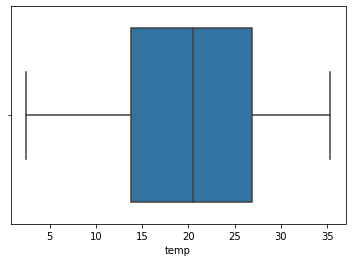

atemp


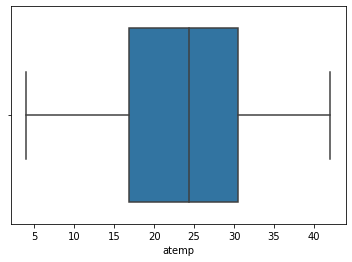

hum


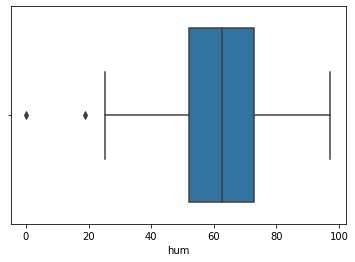

windspeed


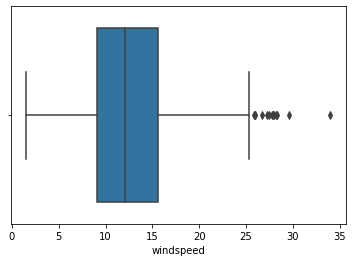

casual


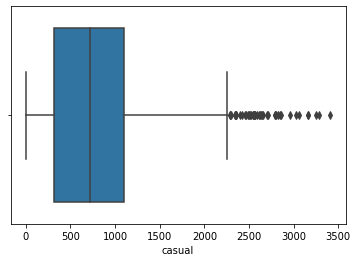

registered


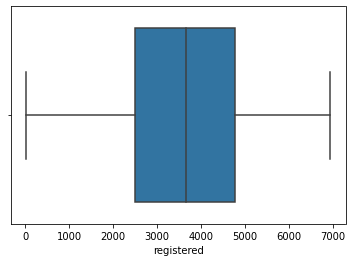

cnt


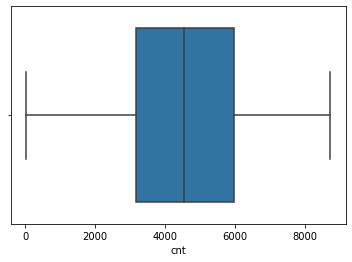

In [26]:
for i in count_cols:
    sns.boxplot(df[i])
    print(i)
    plt.show()

In [27]:
## Some Univariate Analysis Example
### 1. Mean
### 2. Median
### 3. Mode
### 4. count
### 5. Count of unique values
### 6. Value_counts()
### 7. Distribution check
### 8. Count of missing values
### 9. Minimum
### 10. Maximum etc etc etc...

In [28]:
df["windspeed"].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [29]:
q1=9.041650
q3=15.625589
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

In [30]:
lb,ub

(-0.8342584999999971, 25.5014975)

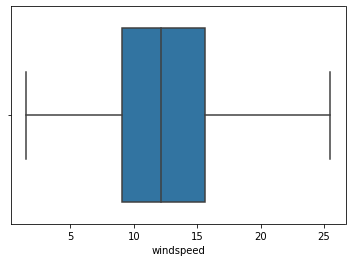

In [32]:
df["windspeed"]=np.where(df["windspeed"]>ub,ub,df["windspeed"])
df["windspeed"]=np.where(df["windspeed"]<lb,lb,df["windspeed"])
sns.boxplot(df["windspeed"])

temp


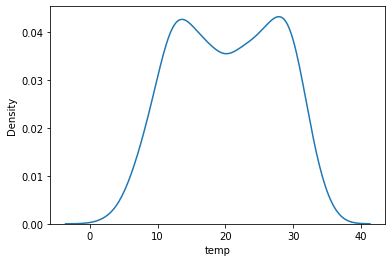

atemp


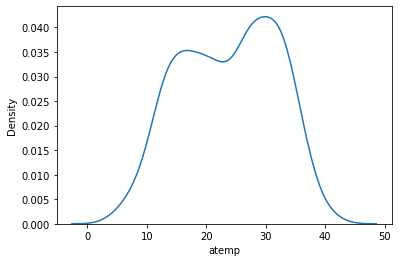

hum


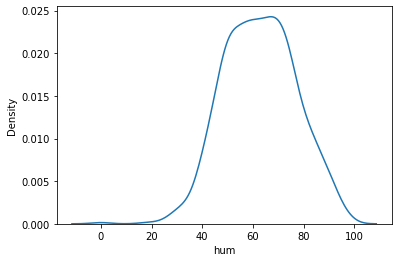

windspeed


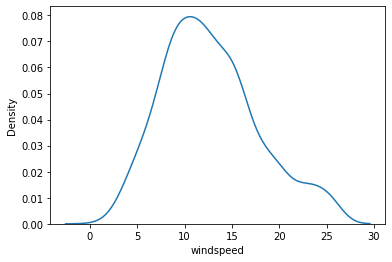

casual


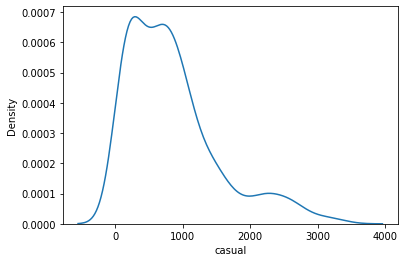

registered


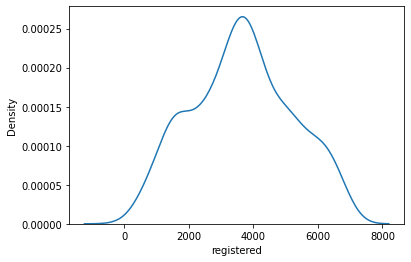

cnt


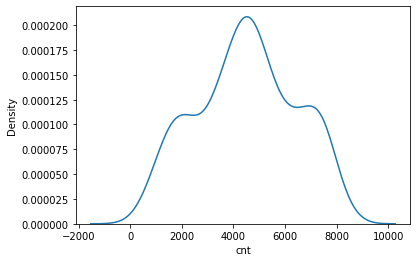

In [34]:
for i in count_cols:
  print(i)
  sns.distplot(df[i],hist=False)
  plt.show()

temp


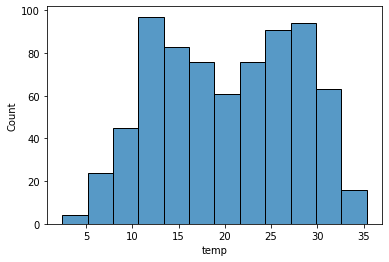

atemp


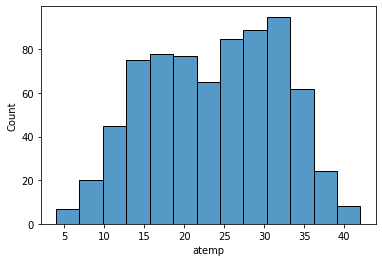

hum


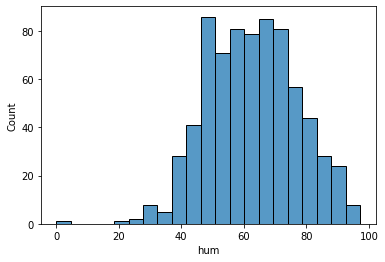

windspeed


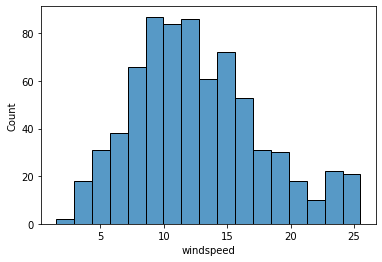

casual


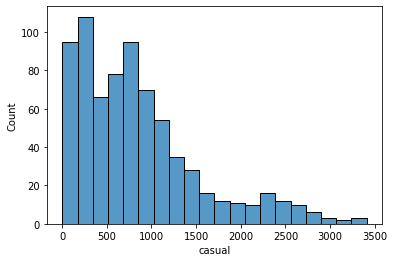

registered


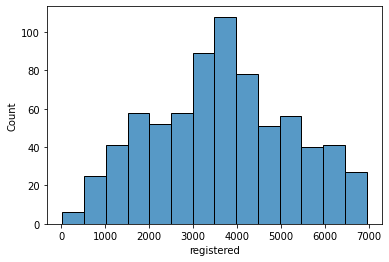

cnt


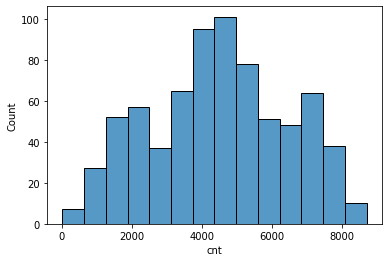

In [37]:
for i in count_cols:
  print(i)
  sns.histplot(df[i])
  plt.show()

season


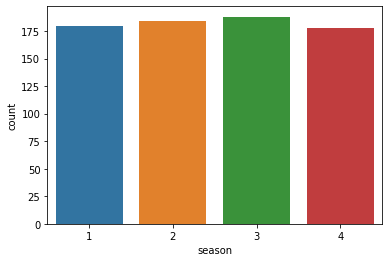

yr


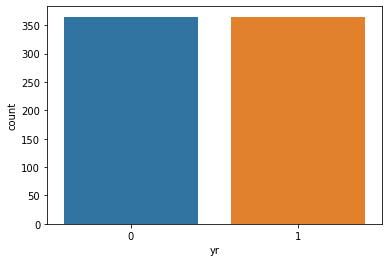

mnth


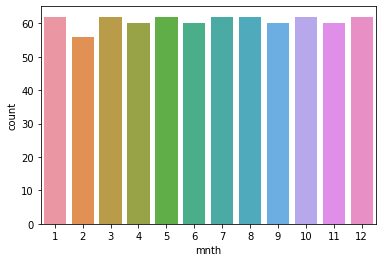

weekday


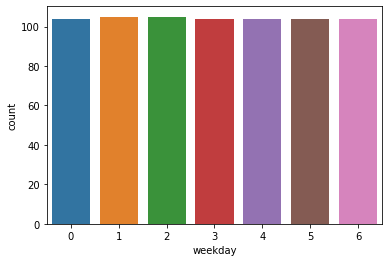

workingday


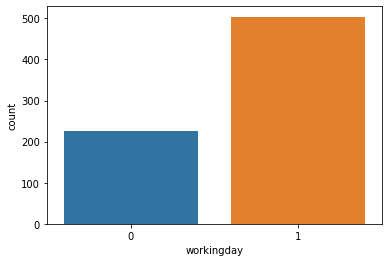

weathersit


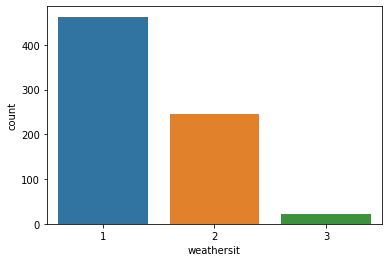

In [35]:
for i in cat_cols:
  print(i)
  sns.countplot(df[i])
  plt.show()

In [36]:
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

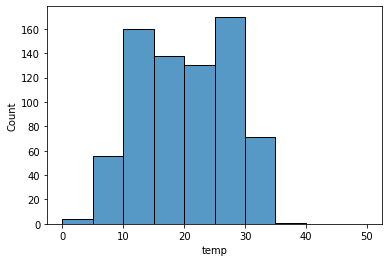

In [38]:
sns.histplot(df["temp"],bins=[0,5,10,15,20,25,30,35,40,45,50])

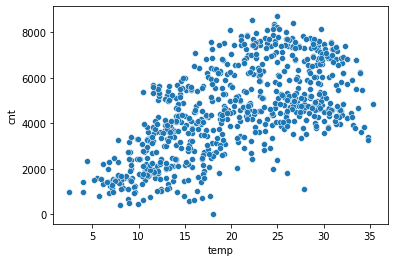

In [39]:
sns.scatterplot(df["temp"],df["cnt"])

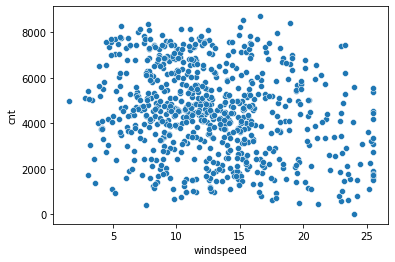

In [40]:
sns.scatterplot(df["windspeed"],df["cnt"])

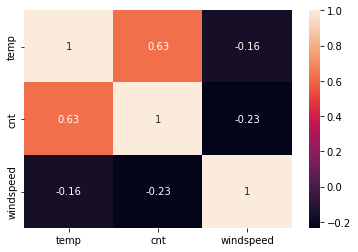

In [42]:
sns.heatmap(df[["temp","cnt","windspeed"]].corr(),annot=True)

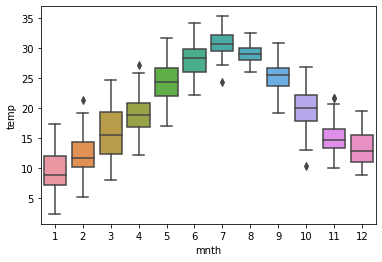

In [44]:
sns.boxplot(x=df["mnth"],y=df["temp"])

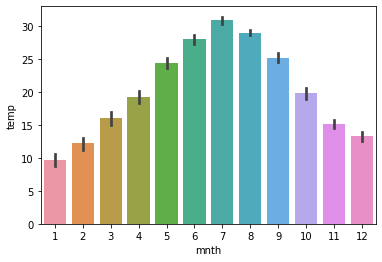

In [45]:
sns.barplot(x=df["mnth"],y=df["temp"])

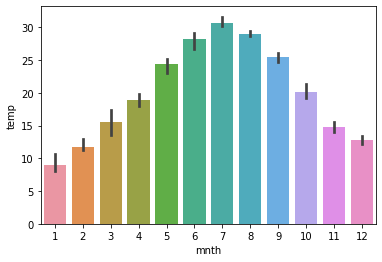

In [47]:
sns.barplot(x=df["mnth"],y=df["temp"],estimator=np.median)

In [ ]:
sns.barplot(x=df["mnth"],y=df["temp"],estimator=np.min,ci=None)